https://somjang.tistory.com/entry/Keras%EA%B8%B0%EC%82%AC-%EC%A0%9C%EB%AA%A9%EC%9D%84-%EA%B0%80%EC%A7%80%EA%B3%A0-%EA%B8%8D%EC%A0%95-%EB%B6%80%EC%A0%95-%EC%A4%91%EB%A6%BD-%EB%B6%84%EB%A5%98%ED%95%98%EB%8A%94-%EB%AA%A8%EB%8D%B8-%EB%A7%8C%EB%93%A4%EC%96%B4%EB%B3%B4%EA%B8%B0

In [38]:
import os

import numpy as np 
import pandas as pd
import os
import glob
import re
import sys
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib import animation, rc
import seaborn as sns

import plotly.express as px
import folium
from folium import plugins
import branca
import json

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots


pio.renderers.default = "notebook_connected"

In [39]:
os.chdir('G:/내 드라이브/Github/Stat_Bigdata_analysis_Competition_2022/2022-1/Data')

In [40]:
# train_data = pd.read_csv("./외부/train.csv")
# test_data = pd.read_csv("./외부/test2.csv")

In [62]:
data = pd.read_csv("./외부/한국언론진흥재단_뉴스빅데이터_메타데이터_ESG_20201231.csv", encoding = 'utf-8')
# data = data.drop('Unnamed: 0', axis = 1)

train_data = data[0:800]
test_data = data[800:1000]

In [63]:
with open("./외부/negative_words_self.txt", encoding = 'utf-8') as neg:
    negative = neg.readlines()
    
negative = [neg.replace("\n", "") for neg in negative]

with open("./외부/positive_words_self.txt", encoding='utf-8') as pos:
    positive = pos.readlines()
    
positive = [pos.replace("\n", "") for pos in positive]

In [64]:
data.head(5)

,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건_사고 분류1,사건_사고 분류2,사건_사고 분류3,개체명(인물),개체명(지역),개체명(기업기관),키워드,특성추출,본문,원본주소
0,http://www.bigkinds.or.kr/news/newsDetailView....,2020-01-01,머니투데이,김지성|정인지|기자|기자|,택배 쓰레기 줄였더니 고객 늘었죠,경제>서비스_쇼핑,경제>유통,경제>자동차,NaN,NaN,NaN,"재이, 최우식","한국, 서울, 일본, 해산, 통영, 서초구","오아시스마켓, ESG, 생협, 오아시스, 생활협동조합","택배,쓰레기,고객,편집,ESG,환경,사회적,책임,지배구조,관심,고조,ESG,친화,기...","소비자,친환경,온라인,아이스팩,소비자들,생협,esg,재활용,최우식,포장상자,물류센터...","[편집자주] ESG(환경, 사회적책임, 지배구조)에 대한 관심이 고조되고 있습니다....",http://news.moneytoday.co.kr/view/mtview.php?n...
1,http://www.bigkinds.or.kr/news/newsDetailView....,2020-01-01,머니투데이,황국상|기자|,"지배구조 개선, 기업·투자자·당국 공동의 노력 필요",경제>경제일반,NaN,NaN,NaN,NaN,NaN,"워렌 첸, 김진성","아시아, 우호, 아시아담당, 싱가폴, 타이완, 한국, 개진","정부, 국민연, ESG, ISS, 산업협회, 한국기업지배구조원, ISS직원","지배,구조,개선,기업,투자자,당국,공동,노력,ESG,환경,사회적,책임,지배구조,관심...","iss,한국,shareholder,timing,투자자,지배구조,워렌,주주총회,esg...","[편집자주] ESG(환경, 사회적책임, 지배구조)에 대한 관심이 고조되고 있습니다....",http://news.moneytoday.co.kr/view/mtview.php?n...
2,http://www.bigkinds.or.kr/news/newsDetailView....,2020-01-01,머니투데이,뉴욕=이상배|특파원|,착한 투자 했더니 오히려 남들보다 잘 벌어,경제>증권_증시,NaN,NaN,사회>사회문제>학대,사회>사회문제>빈곤,NaN,"아담 벤델, 비욘드, 벤델, 이철영, 이덕준, 이상배","독일, 미국, 일본, 영국, 뉴욕, 케냐, 네덜란드, 한국, 샌프란시스코, 나이로비","매사추세츠공대, 아크임팩트자산운용, 벤델, 정부, 맨해튼, ESG, MIT, 한국,...","투자,남들,ESG,환경,사회적,책임,지배구조,관심,고조,ESG,친화,기업,투자,글로...","투자자,toniic,한국,벤델,비욘드미트,대기업,화장실,esg,뉴욕,대체육류","[편집자주] ESG(환경, 사회적책임, 지배구조)에 대한 관심이 고조되고 있습니다....",http://news.moneytoday.co.kr/view/mtview.php?n...
3,http://www.bigkinds.or.kr/news/newsDetailView....,2020-01-01,머니투데이,박광범|기자|,'착해야' 살아 남는다…변신 꾀하는 기업들,경제>경제일반,NaN,NaN,사고>산업사고>폭발,NaN,NaN,"메리 배라, 팀쿡, 제프 베조스, 마틴","독일, 회계, 태국, 인도네시아, 네덜란드, 베트남, 최고경영자, 영국, 인도, 동...","미국, OECD, 월가, 연세대학교, VBA, ESG, 신한금융그룹, 경제협력개발기...","변신,기업들,ESG,기업,바스프,지속,가능,미래,화학,창조,유니레버,절약,헹금,세제...","바스프,유니레버,esg,sustainable,기업들,베트남,동남아시아,배출량,폐플라...",..ESG]1-<7> 기업이 변한다....ESG 인식 태동 단계] ..전세계적으로 ...,http://news.moneytoday.co.kr/view/mtview.php?n...
4,http://www.bigkinds.or.kr/news/newsDetailView....,2020-01-01,매일경제,이새하,금융사 기업대출 심사때 'ESG 기준' 뜬다,경제>산업_기업,경제>금융_재테크,IT_과학>보안,NaN,NaN,NaN,"윤종규, 은성수","신금융, 파리","사회공헌문화부, SCB, UNEP, 피치, ESG, 유엔, 유엔환경계획 금융이니셔티...","기준,금융사,기업,대출,심사,ESG,금융권,ESG,환경,사회책임,지배구조,화두,금융...","esg,중소기업,금융사,비재무,kb,신용평가,scb,크레비스,관계자,현대커머셜,윤종...",ESG(환경·사회책임·지배구조)'가 새 화두로 떠오르고 있다...금융사들이 ESG에...,http://news.mk.co.kr/newsRead.php?no=2256&year...


In [65]:
# train_data = train_data.drop("Unnamed: 0", axis=1)
# test_data = test_data.drop("Unnamed: 0", axis=1)
# test_data = test_data.drop("Unnamed: 0.1", axis=1)

In [66]:
from tqdm import tqdm
import re

labels = []

title_data = list(test_data['제목'])

for title in tqdm(title_data):
  clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', str(title)) 
  negative_flag = False
  label = 0
  for i in range(len(negative)):
    if negative[i] in clean_title:
      label = -1
      negative_flag = True
#      print("negative 비교단어 : ", negative[i], "clean_title : ", clean_title) 
      break
  if negative_flag == False:
    for i in range(len(positive)):
      if positive[i] in clean_title:
        label = 0
#        print("positive 비교단어 : ", positive[i], "clean_title : ", clean_title)
        break

  labels.append(label)

test_data['label'] = labels

100%|█████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 32976.68it/s]
<ipython-input-66-13544043c3cd>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
from tqdm import tqdm
import re

labels = []

title_data = list(train_data['제목'])

for title in tqdm(title_data):
  clean_title = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', str(title)) 
  negative_flag = False
  label = 0
  for i in range(len(negative)):
    if negative[i] in clean_title:
      label = -1
      negative_flag = True
#      print("negative 비교단어 : ", negative[i], "clean_title : ", clean_title) 
      break
  if negative_flag == False:
    for i in range(len(positive)):
      if positive[i] in clean_title:
        label = 0
#        print("positive 비교단어 : ", positive[i], "clean_title : ", clean_title)
        break

  labels.append(label)

train_data['label'] = labels

100%|█████████████████████████████████████████████████████████████████████████████| 800/800 [00:00<00:00, 40000.04it/s]
<ipython-input-67-3b26c0ad8d0c>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

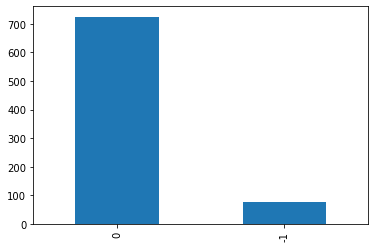

In [69]:
train_data['label'].value_counts().plot(kind='bar')

In [70]:
train_data['label'].value_counts()

 0    725
-1     75
Name: label, dtype: int64

In [71]:
test_data['label'].value_counts()

 0    191
-1      9
Name: label, dtype: int64

In [51]:
print(train_data.groupby('label').size().reset_index(name='count'))
print(test_data.groupby('label').size().reset_index(name='count'))

   label  count
0     -1     75
1      0    725
   label  count
0     -1      9
1      0    191
